In [128]:
import numpy as np
import astropy.io.fits as fits
import glob
import matplotlib.pyplot as plt
import astropy
from astropy import modeling
from scipy.signal import argrelextrema
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit

#wavelength, flux
def wf(dat): #whichord,dat. Setup:   w,f=wf(#,dat)
    w=np.array([d[0] for d in dat])
    f=np.array([d[1] for d in dat])
    return w,f

#Ultimate opendat:
def opendatt(dir,filename,spl=''): #dir,'filename'. For opening a data file. Can then send through roundtable.
    f=open(dir+filename,'r')
    dat=f.readlines()
    f.close()
    if spl=='':
        labels=dat[0][0:-1].split()
        dat2=[[a.strip('\n') for a in d.split()] for d in dat if d[0]!='#']
    else:
        labels=dat[0][0:-1].split(spl)
        dat2=[[a.strip('\n') for a in d.split(spl)] for d in dat if d[0]!='#']
    dat3=[['nan' if a.strip()=='' else a for a in d] for d in dat2]
    return [dat3,labels]

def opendat(dirr,filename,params,splitchar=''): #Use as var,var,var...=opendat(dir,'filename',['keys']).
    if splitchar=='':
        dat,label=opendatt(dirr,filename)
    else:
        dat,label=opendatt(dirr,filename,splitchar)  #Get keys by first leaving ['keys'] blank: opendat(dirr,filename,[])
    print(label)
    varrs=[]
    for i in range(len(params)):
        j=label.index(params[i])
        try:
            var=np.array([float(d[j]) for d in dat]) #works for float.
            varrs.append(var)
        except ValueError:
            var=[d[j].strip() for d in dat] #works for strings.
            varrs.append(var)
    if len(params)==1:
        varrs=varrs[0]
    return varrs

def writedat(dirr,filename,pars,label): #.dat auto included. pars as [name,ra,dec] etc.
    datp=[[str(a[i]) for a in pars] for i in range(len(pars[0]))]
    f=open(dirr+filename+'.dat','w')
    print('\t'.join(label),file=f)
    print(label)
    for d in datp:
        print('\t'.join(d),file=f)
    f.close()
    print('It is written: '+filename+'.dat')


wecfzst_0057_CG4_8_comp_165.98-175.83.fits:
lamp_Ne

wecfzst_0057_CG4_8_comp_165.98-175.83.fits
LAMP_HGA FALSE
LAMP_NE TRUE
LAMP_AR FALSE
LAMP_FE FALSE
LAMP_CU FALSE
LAMP_QUA FALSE
LAMP_QPE 0.0
LAMP_BUL FALSE
LAMP_DOM FALSE
LAMP_DPE 0.0
Model: Chebyshev1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                c1                  c2                   c3         
    ----------------- ------------------ -------------------- --------------------
    5838.227243554485 0.3141240217902517 -7.6491881920174e-07 -5.9727930552557e-11


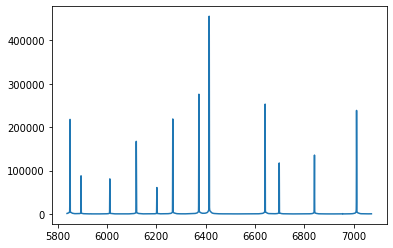

In [129]:
#Our file, star with a Ne lamp
#file='wecfzst_0057_CG4_8_comp_165.98-175.83_NEW.fits'
file='wecfzst_0057_CG4_8_comp_165.98-175.83.fits'
#file='wecfzst_0056_CG4_8.fits'

hdu=fits.open(file)
data=hdu[0].data
head=hdu[0].header
hdu.close()
print('\n'+file+':')
print(head['OBJECT'])
print(head['WAVMODE'])
print(head['GSP_FNAM'])
#print(head['GSP_FUNC'])
for h in head:
    if 'LAMP' in h:
        print(h,head[h])
f=data

d={'c0':head['GSP_C000'],'c1':head['GSP_C001'],'c2':head['GSP_C002'],'c3':head['GSP_C003']}
C=modeling.polynomial.Chebyshev1D(3,**d)
print(C)

w=C(range(head['GSP_NPIX']))

plt.plot(w,f)


goodman_comp_2100_650_GG455_HgNeAr_NEW.fits:
OBJECT lamp_Ne
WAVMODE 
GSP_FUNC Chebyshev1D
GSP_FNAM goodman_comp_2100_650_GG455_NeHgAr.fits
LAMP_NE TRUE
LAMP_AR FALSE
LAMP_FE FALSE
LAMP_CU FALSE
LAMP_QUA FALSE
LAMP_QPE 0.0
LAMP_BUL FALSE
LAMP_DOM FALSE
LAMP_DPE 0.0
LAMP_HGA FALSE
Model: Chebyshev1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 3
Parameters:
            c0                 c1                  c2                  c3         
    ----------------- ------------------- ------------------- --------------------
    6134.757573933042 0.14942319843612395 -9.190352382355e-07 -2.7530156141553e-11


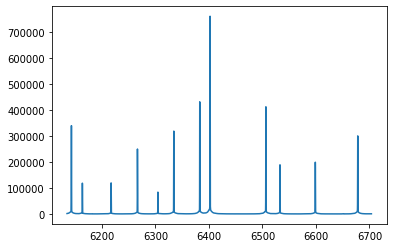

In [130]:
#Their 2100 file, with HgArNe lamp
file2='goodman_comp_2100_650_GG455_HgNeAr_NEW.fits'

hdu2=fits.open(file2)
data2=hdu2[0].data
head2=hdu2[0].header
hdu2.close()
print('\n'+file2+':')
print('OBJECT',head2['OBJECT'])
print('WAVMODE',head2['WAVMODE'])
print('GSP_FUNC',head['GSP_FUNC'])
print('GSP_FNAM',head2['GSP_FNAM'])
for h in head2:
    if 'LAMP' in h:
        print(h,head2[h])
f2=data2

d2={'c0':head2['GSP_C000'],'c1':head2['GSP_C001'],'c2':head2['GSP_C002'],'c3':head2['GSP_C003']}
C2=modeling.polynomial.Chebyshev1D(3,**d2)
print(C2)

w2=C2(range(head2['GSP_NPIX']))
plt.plot(w2,f2)

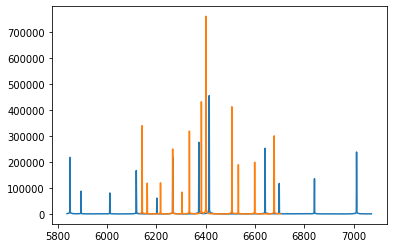

In [131]:
plt.plot(w,f)
plt.plot(w2,f2)

In [132]:
print(len(w),len(w2))

4060 4060


In [133]:
len(data)
len(data2)

4060

In [134]:
print(head2)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =                 4060                                                  ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        IRAF-TLM= '2024-05-08T18:56:30' / Time of last modification                     DATE-OBS= '2021-10-21T06:06:55.840' / ISO-8601 time of observation              DATE    = '2024-05-08T18:53:49' / Date Format is YYYY-MM-DD                     TIME    = '06:06:55.840 to 06:06:56.349' / ~ Start & Stop of Exposure           N_PRM0  =                   59 / Status                                         PG0_0   =                24624 / Camera Flags,                                  PG0_1   =           895078.436 / Camera Up Time, HH:MM:SS.sss                   PG0_2   =                    0 / Continu

In [135]:
fn0,wn0=opendat('','NeonLines.txt',['#Intensity', 'Wavelength(A)'],splitchar='\t')
print(fn0)

['#Intensity', 'Wavelength(A)', 'Spectrum', '', 'Reference', ' ', '', ' ', '', ' ', '', ' ', '', ' ', '', ' ', '', ' ']
['80', '80', '150', '200', '120', '80', '90 w', '80', '80', '90 w', '80', '80', '80', '90', '80', '100', '80', '80', '90', '90', '80', '80', '80', '80 w', '80', '90', '150', '150', '150', '100', '30', '100', '30', '150', '120', '300 P', '300 P', '100', '120', '100', '100', '100', '100', '100', '120', '100', '100', '30', '100', '100', '100', '100', '100', '100', '120', '100', '120', '100', '100', '100', '100', '120', '300', '100', '100', '100', '100', '100', '120', '500 P', '60', '120', '120', '150', '150', '120', '120', '200', '120', '120', '150', '100', '100', '100', '100', '150', '150', '300', '1000 P', '150', '100', '200', '150', '300', '150', '200', '120', '200', '120', '100', '120', '50', '70', '100', '500 P', '150', '120', '300', '100', '120', '100', '120', '120', '50', '5', '120', '20', '10', '100', '100', '10', '10', '20', '50', '150', '200', '200', '10', '20'

['#Intensity', 'Wavelength(A)', 'Spectrum', '', 'Reference', ' ', '', ' ', '', ' ', '', ' ', '', ' ', '', ' ', '', ' ']
[6143.0626, 6163.5939, 6217.2812, 6266.495, 6304.7889, 6334.4278, 6382.9917, 6402.248, 6506.5281, 6532.8822, 6598.9529, 6678.2762]


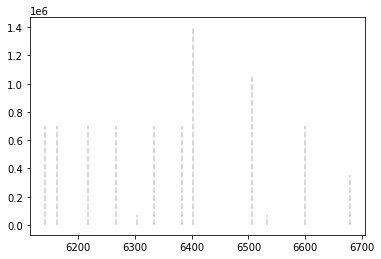

In [136]:
#check neon lines

fn,wn0=opendat('','NeonLines.txt',['#Intensity', 'Wavelength(A)'],splitchar='\t')
# wn0=[float(wn[i]) for i in range(len(wn)) if wn[i] not in ['P','w']]
fn0=[float(fn[i].strip('P').strip('w')) for i in range(len(wn0))]
wN0=[wn0[i] for i in range(len(wn0)) if wn0[i]>6100 and wn0[i]<6800]
fN0=[fn0[i] for i in range(len(wn0)) if wn0[i]>6100 and wn0[i]<6800]

print(wN)

#Remove lines missing from their lamp:
remove=[6128.4499,6182.146,6328.1646,6652.0927,6717.043]
wN=[wN0[i] for i in range(len(wN0)) if wN0[i] not in remove]
fN=[fN0[i] for i in range(len(wN0)) if wN0[i] not in remove]

#save
#writedat('','NeLines',[wN,fN],['#wavelength','flux'])

#plot all lines:

for i in range(len(wN)):
    plt.plot([wN[i],wN[i]],[0,fN[i]*7000],ls='--',c='gray',alpha=0.4)
    
# #check mercury lines

# fh,wh=opendat('','MercuryLines.txt',['#Intensity', 'Wavelength(A)'])
# wh0=[float(wh[i]) for i in range(len(wh)) if wh[i] not in ['P','w','P,c','c','h']]
# fh0=[float(fh[i]) for i in range(len(wh)) if wh[i]not in ['P','w','P,c','c','h']]
# wH=[wh0[i] for i in range(len(wh0)) if wh0[i]>6100 and wh0[i]<7000]
# fH=[fh0[i] for i in range(len(wh0)) if wh0[i]>6100 and wh0[i]<7000]

# print(wH)

# #plot all lines:

# for i in range(len(wH)):
#     plt.plot([wH[i],wH[i]],[0,fH[i]*7000],ls='--',c='gold',alpha=0.4)
    
# #check argon lines

# fa,wa=opendat('','ArgonLines.txt',['#Intensity', 'Wavelength(A)'])
# wa0=[float(wa[i]) for i in range(len(wa)) if wa[i] not in ['P','w']]
# fa0=[float(fa[i]) for i in range(len(wa)) if wa[i]not in ['P','w']]
# wA=[wa0[i] for i in range(len(wa0)) if wa0[i]>6100 and wa0[i]<7000]
# fA=[fa0[i] for i in range(len(wa0)) if wa0[i]>6100 and wa0[i]<7000]

# print(wA)

# #plot all lines:

# for i in range(len(wA)):
#     plt.plot([wA[i],wA[i]],[0,fA[i]*7000],ls='--',c='hotpink',alpha=0.4)

Downloaded wavelength solution is good. Pipeline-generated w solution is NOT.


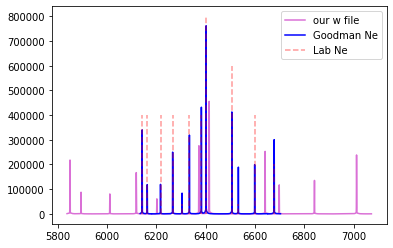

In [137]:
#plt.plot(w,f)
plt.plot(w,f,c='orchid',label='our w file')
plt.plot(w2,f2,c='blue',label='Goodman Ne')
for i in range(len(wN))[:-1]:
    plt.plot([wN[i],wN[i]],[0,fN[i]*4000],ls='--',c='red',alpha=0.4)
plt.plot([wN[-1],wN[-1]],[0,fN[-1]*4000],ls='--',c='red',alpha=0.4,label='Lab Ne')
# for i in range(len(wH)):
#     plt.plot([wH[i],wH[i]],[0,fH[i]*7000],ls='--',c='gold',alpha=0.4)
# for i in range(len(wA)):
#     plt.plot([wA[i],wA[i]],[0,fA[i]*7000],ls='--',c='hotpink',alpha=0.4)
print('Downloaded wavelength solution is good. Pipeline-generated w solution is NOT.')
plt.legend()

In [138]:
#Try specifying wavmode? Make OURS match DOWNLOADED?

# Our own wavelength solution


ecfzst_0057_CG4_8_comp_165.98-175.83.fits:
lamp_Ne

ecfzst_0057_CG4_8_comp_165.98-175.83.fits
EXPTIME 0.5
LAMP_HGA FALSE
LAMP_NE TRUE
LAMP_AR FALSE
LAMP_FE FALSE
LAMP_CU FALSE
LAMP_QUA FALSE
LAMP_QPE 0.0
LAMP_BUL FALSE
LAMP_DOM FALSE
LAMP_DPE 0.0


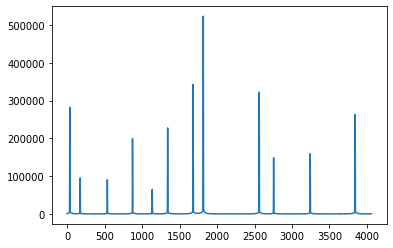

In [139]:
#Our file, star with a Ne lamp, e version
file='ecfzst_0057_CG4_8_comp_165.98-175.83.fits'

hdu=fits.open(file)
data=hdu[0].data
head=hdu[0].header
hdu.close()
print('\n'+file+':')
print(head['OBJECT'])
print(head['WAVMODE'])
print(head['GSP_FNAM'])
print('EXPTIME',head['EXPTIME'])
#print(head['GSP_FUNC'])
for h in head:
    if 'LAMP' in h:
        print(h,head[h])
f=data

#pixels
p=range(len(f))

plt.plot(p,f)

[55, 192, 555, 891, 1154, 1360, 1699, 1835, 2582, 2774, 3262, 3862]
6142.970272286097 340051.3052659333
6163.378290916179 118633.2988315044
6217.102452823961 119566.66492127968
6266.356541903969 250029.25602417035
6304.574924675124 84035.83440568832
6334.29642609846 319097.8406715479
6382.781744615737 431834.14431985584
6402.0795275854825 761369.1624851614
6506.418805549015 412611.2503553739
6532.762785173573 189196.86572720477
6598.795532100762 199304.18227305872
6678.071908303415 300626.77175858576


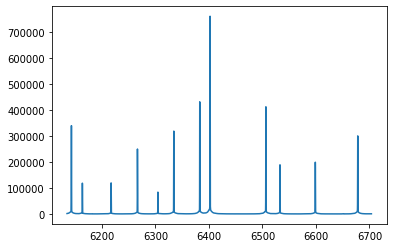

In [140]:
#try finding peaks in their (goodman's) Ne file

plt.plot(w2,f2)

maxx=[i for i in argrelextrema(f2,np.greater)[0] if f2[i]>20000]
print(maxx)
for m in maxx:
    print(w2[m],f2[m])

(3000.0, 20000.0)

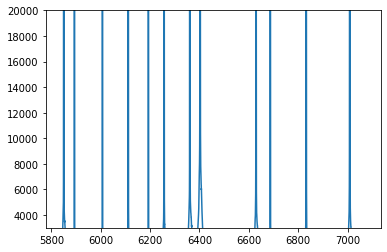

In [141]:
plt.plot(w,f)
plt.ylim(3000,20000)

In [142]:
for i in range(len(wN)):
    print(wN[i],fN[i])

#remove 6128.4499,6182.146,6328.1646,6652.0927,6717.043

6143.0626 100.0
6163.5939 100.0
6217.2812 100.0
6266.495 100.0
6304.7889 10.0
6334.4278 100.0
6382.9917 100.0
6402.248 200.0
6506.5281 150.0
6532.8822 10.0
6598.9529 100.0
6678.2762 50.0


0.14942136033732822 0.12906205051694997


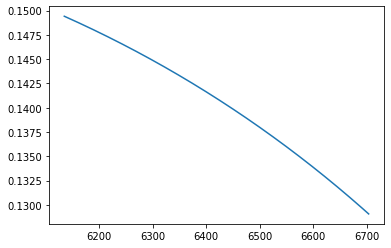

In [143]:
print(w2[1]-w2[0],w2[-1]-w2[-2])
plt.plot(w2[:-1],[w2[i+1]-w2[i] for i in range(len(w2)-1)])

how find center of emission line? Fit a Gaussian?? Yes.

Approach: We fit Guassian to each strong line in our neon spectrum--do Goodman downloaded file too, to check it's working. Get fractional pixel center of each emission line.

Map each fractional pixel center to lab neon line wavelength.

Fit a function (Chebyshev again?) to the pixel-wavelength data. Maps fractional pixels to line central wavelengths.

Now take the real pixels (0,1,2,3,...,4059) and input into our function, should map to wavelengths! Yay!

[37, 175, 537, 873, 1136, 1342, 1681, 1817, 2563, 2755, 3243, 3842]
37 : 281734.04616679123
175 : 95358.1795899088
537 : 90451.03125225606
873 : 199331.99513066036
1136 : 65026.24045144633
1342 : 227465.52001030697
1681 : 342350.72953091224
1817 : 522882.19850754633
2563 : 322060.97311160853
2755 : 148261.64359744266
3243 : 159187.9628532906
3842 : 263071.06757781113
base flux: 4984.022627266109 4735.056603089559


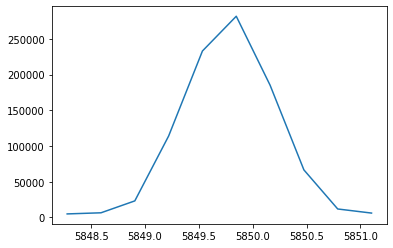

In [234]:
#try with our star+Ne:

maxx=[i for i in argrelextrema(f,np.greater)[0] if f[i]>10000]
print(maxx)
for m in maxx:
    print(m,':',f[m])

b,e=32,42
plt.plot(w[b:e],f[b:e])
#lines about 10 pixels wide, try search out to 20 on each side.
print('base flux:',f[b],f[e])

281734.04616679123
281734.04616679123
33 41


Text(0, 0.5, 'flux count')

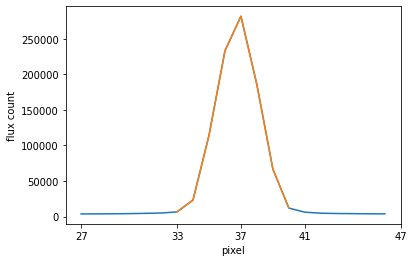

In [235]:
#Fit each maxx line peak out to 5000 flux counts:

#line 1:
#go out left until below 5000, out right until below 5000
cp=maxx[0] #central pixel

b,e=cp-10,cp+10
plt.plot(range(b,e),f[b:e])

p=[] #left edge of line
i=cp
print(f[i])
while f[i]>5000:
    p.append(i)
    i-=1
l=np.min(p)

p=[] #right edge of line
i=cp
print(f[i])
while f[i]>5000:
    p.append(i)
    i+=1
r=np.max(p)

del p
print(l,r)

pe=np.array(range(l,r)) #pixels of the emission line
fe=np.array([f[i] for i in pe]) #fluxes of the emission line
plt.plot(pe,fe)
plt.xticks([b,l,cp,r,e])
plt.xlabel('pixel')
plt.ylabel('flux count')

Pixel center of emission line: 36.793847000186794


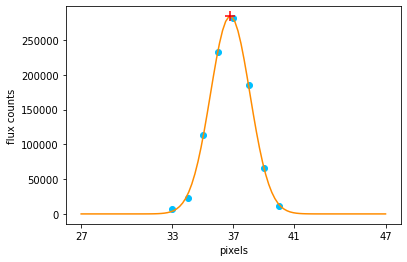

In [225]:
#fit a Gaussian to the emission line to find its center!

PE = ar(pe)
FE = ar(fe)

n = len(FE)  ## <---
mean = sum(FE*PE)/n
sigma = sqrt(sum(FE*(PE-mean)**2)/n)

def gaus(x,a,mu,sigma):
    return a*exp(-(x-cp-mu)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,PE,FE)#,p0=[0.18,mean,sigma])  ## <--- leave out the first estimation of the parameters

xx = np.linspace( cp-10, cp+10, 100 )  ## <--- calculate against a continuous variable

plt.scatter(PE, FE, label = "Measured",c='deepskyblue')
plt.plot(xx,gaus(xx,*popt),c='darkorange',label='Fit')  ## <--- plot against the contious variable

wc=cp+popt[1] #central wavelength
plt.scatter(wc,gaus(wc,*popt),zorder=10,marker='+',s=100,c='red')
plt.xticks([b,l,cp,r,e])
plt.xlabel('pixel')
plt.ylabel('flux count')
print('Pixel center of emission line:',wc)

In [298]:
#Define pixel-center-finding function:

def centralpixels(f,pltt='y'): #give flux, toggle plots; compare to lab Ne at end
    maxx=[i for i in argrelextrema(f,np.greater)[0] if f[i]>10000]
    print(maxx)
    for m in maxx:
        print(m,':',f[m])
        
    #check you got them all:
    if pltt=='y':
        plt.figure()
        plt.plot(f)
        plt.scatter(maxx,np.array(f)[np.array(maxx)],c='darkorange')
        plt.xlabel('pixel')
        plt.ylabel('flux count')
    
    #Fit each maxx line peak out to 5000 flux counts:
    pcs=[] #pixel centers
    for i in range(len(maxx)):
        #go out left until below 5000, out right until below 5000
        cp=maxx[i] #central pixel
        b,e=cp-10,cp+10

        p=[] #left edge of line
        i=cp
        #print(f[i])
        while f[i]>5000 and abs(cp-i)<10:
            p.append(i)
            i-=1
        l=np.min(p)

        p=[] #right edge of line
        i=cp
        #print(f[i])
        while f[i]>5000 and abs(cp-i)<10:
            p.append(i)
            i+=1
        r=np.max(p)

        del p
        #print(l,r)

        pe=np.array(range(l,r)) #pixels of the emission line
        fe=np.array([f[i] for i in pe]) #fluxes of the emission line
        
        if pltt=='y':
            plt.figure()
            plt.plot(range(b,e),f[b:e])
            plt.plot(pe,fe)
            plt.xticks([b,l,cp,r,e])
            plt.xlabel('pixel')
            plt.ylabel('flux count')
        
        #fit a Gaussian to the emission line to find its center!

        PE = ar(pe)
        FE = ar(fe)

        n = len(FE)  ## <---
        mean = sum(FE*PE)/n
        sigma = sqrt(sum(FE*(PE-mean)**2)/n)

        def gaus(x,a,mu,sigma):
            return a*exp(-(x-cp-mu)**2/(2*sigma**2))

        popt,pcov = curve_fit(gaus,PE,FE)#,p0=[0.18,mean,sigma])  ## <--- leave out the first estimation of the parameters

        xx = np.linspace( cp-10, cp+10, 100 )  ## <--- calculate against a continuous variable
        pc=cp+popt[1] #central wavelength
        
        if pltt=='y':
            plt.figure()
            plt.scatter(PE, FE, label = "Measured",c='deepskyblue')
            plt.plot(xx,gaus(xx,*popt),c='darkorange',label='Fit')  ## <--- plot against the contious variable
            plt.scatter(pc,gaus(pc,*popt),zorder=10,marker='+',s=100,c='red')
            plt.xticks([b,l,cp,r,e])
            plt.xlabel('pixel')
            plt.ylabel('flux count')
        
        print('Pixel center of emission line:',pc)
        pcs.append(pc)
    
    #Check results against lab Ne
    print('\nNeon lines needed:',len(wN))
    print('emission lines found:',len(pcs))
    if len(wN)-len(pcs)>0:
        print('!!! line(s) not found!')
    plt.figure()
    plt.plot(f)
    for p in pcs:
        plt.plot([p,p],[np.min(f),np.max(f)],c='darkorange',alpha=0.5)
    
    return pcs

[37, 175, 537, 873, 1136, 1342, 1681, 1817, 2563, 2755, 3243, 3842]
37 : 281734.04616679123
175 : 95358.1795899088
537 : 90451.03125225606
873 : 199331.99513066036
1136 : 65026.24045144633
1342 : 227465.52001030697
1681 : 342350.72953091224
1817 : 522882.19850754633
2563 : 322060.97311160853
2755 : 148261.64359744266
3243 : 159187.9628532906
3842 : 263071.06757781113
Pixel center of emission line: 36.793847000186794
Pixel center of emission line: 174.6868896888165
Pixel center of emission line: 537.4104216443047
Pixel center of emission line: 872.9735729024277
Pixel center of emission line: 1136.3465205635105
Pixel center of emission line: 1341.6494273065712
Pixel center of emission line: 1680.9757751760992
Pixel center of emission line: 1816.5977239110193
Pixel center of emission line: 2562.8159170242625
Pixel center of emission line: 2754.767319312193


/Users/Cougy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Pixel center of emission line: 3242.6474785164037
Pixel center of emission line: 3842.3661414739504

Neon lines needed: 12
emission lines found: 12


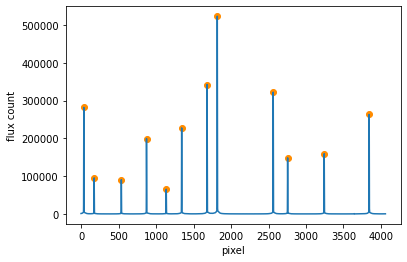

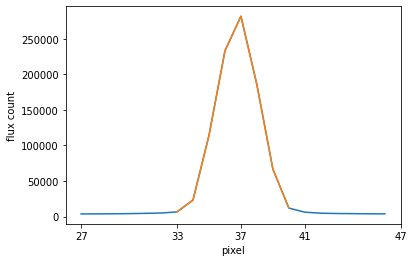

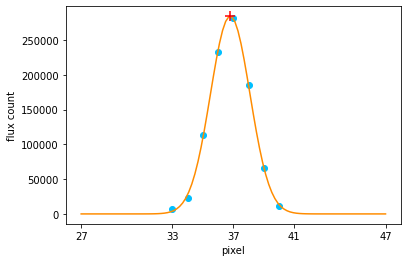

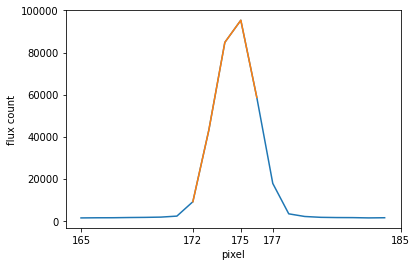

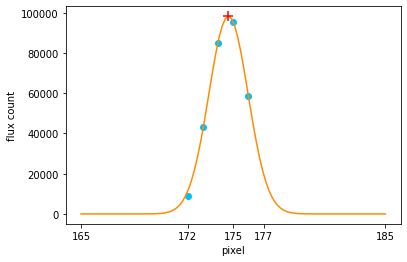

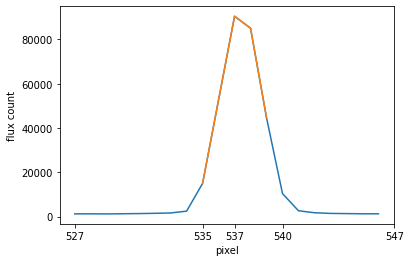

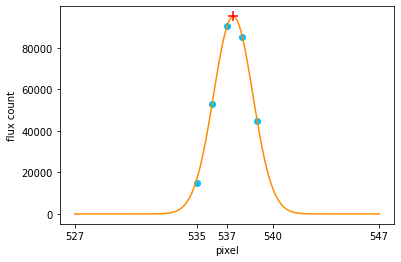

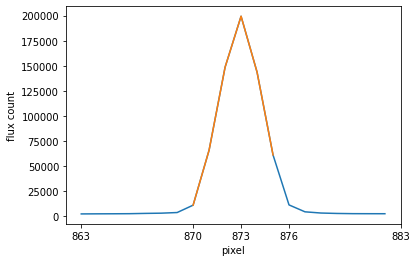

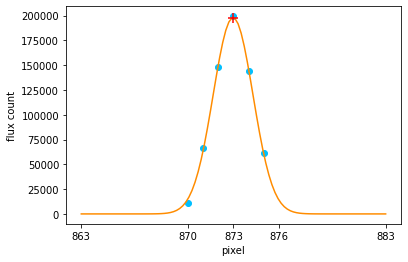

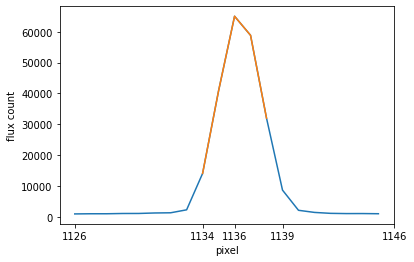

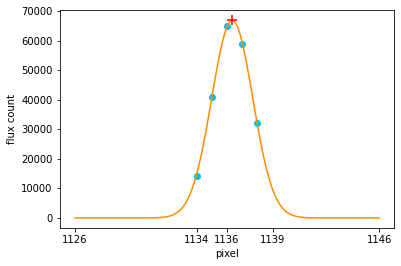

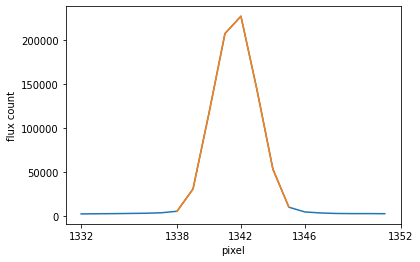

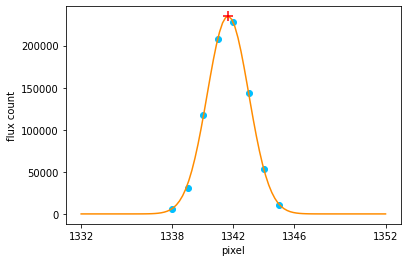

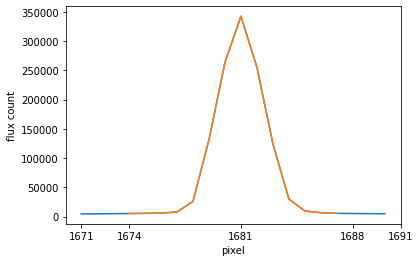

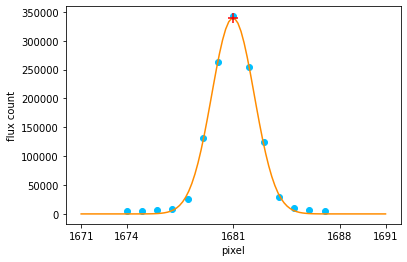

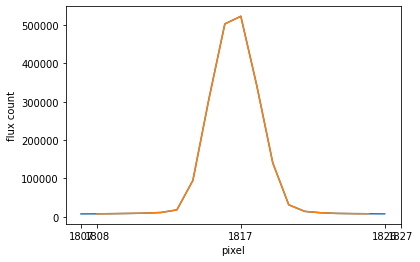

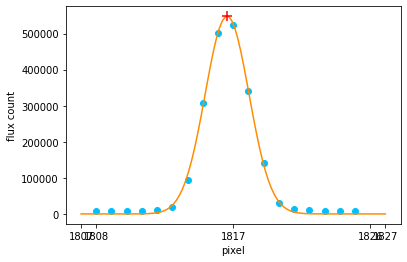

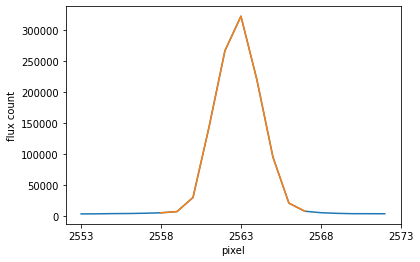

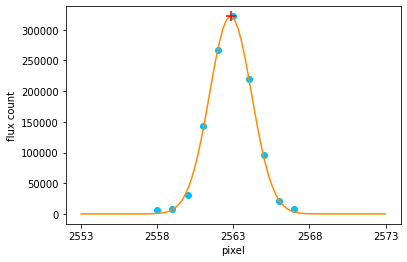

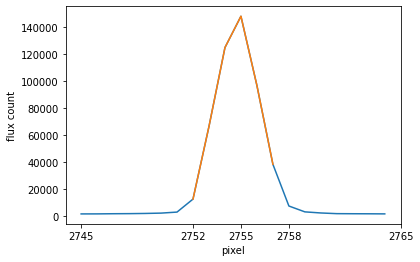

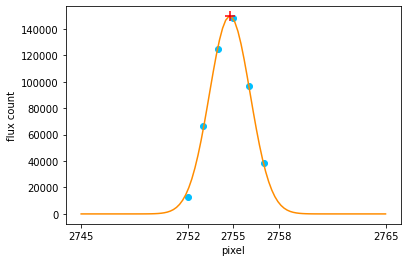

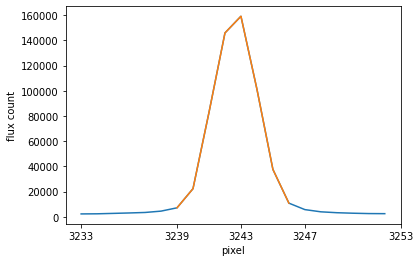

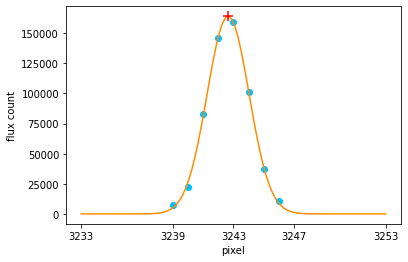

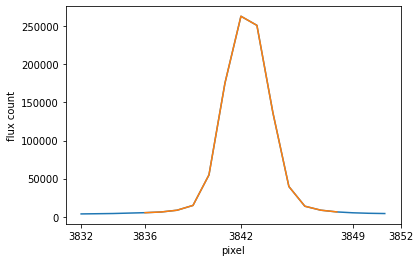

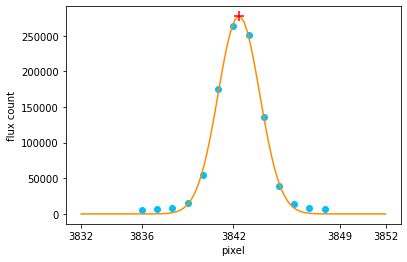

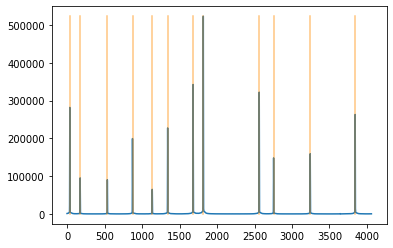

In [299]:
pc=centralpixels(f)

In [247]:
print(pc)

[36.793847000186794, 174.6868896888165, 537.4104216443047, 872.9735729024277, 1136.3465205635105, 1341.6494273065712, 1680.9757751760992, 1816.5977240352452, 2562.8159170242625, 2754.767319312193, 3242.6474785164037, 3842.3661414739504]


In [248]:
print(wN)

[6143.0626, 6163.5939, 6217.2812, 6266.495, 6304.7889, 6334.4278, 6382.9917, 6402.248, 6506.5281, 6532.8822, 6598.9529, 6678.2762]


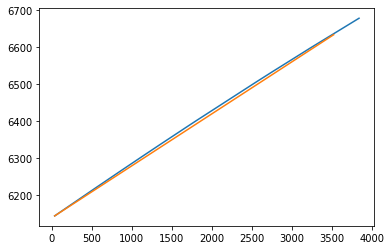

In [261]:
plt.plot(pc,wN)
plt.plot(np.arange(np.min(pc),np.max(pc),(np.max(pc)-np.min(pc))/len(pc)),np.arange(np.min(wN),np.max(wN),(np.max(wN)-np.min(wN))/len(wN)))

0.26240019068906784


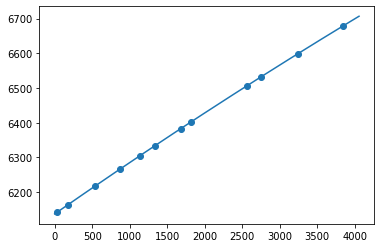

In [293]:
wfitz,a,b,c,d=np.polyfit(pc,wN,2,full=True)
print(a[0])

x=range(len(f))
wfit=np.poly1d(wfitz)
plt.scatter(pc,wN)
plt.plot(x,wfit(x))

0.0008169630262658685


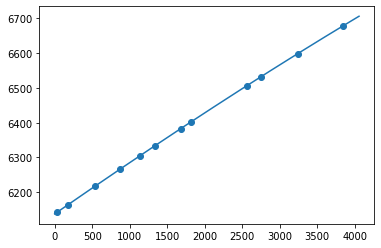

In [295]:
wfitz,a,b,c,d=np.polyfit(pc,wN,3,full=True)
print(a[0])

x=range(len(f))
wfit=np.poly1d(wfitz)
w=wfit(x)
plt.scatter(pc,wN)
plt.plot(x,w)

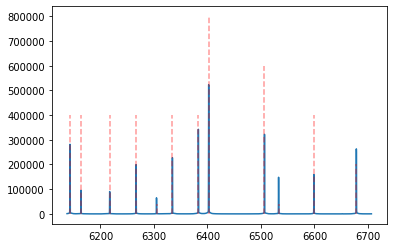

In [296]:
plt.plot(w,f)
#plt.plot(w2,f2)
for i in range(len(wN))[:-1]:
    plt.plot([wN[i],wN[i]],[0,fN[i]*4000],ls='--',c='red',alpha=0.4)
plt.plot([wN[-1],wN[-1]],[0,fN[-1]*4000],ls='--',c='red',alpha=0.4,label='Lab Ne')


ecfzst_0056_CG4_8.fits:
CG4_8

ecfzst_0056_CG4_8.fits
LAMP_HGA FALSE
LAMP_NE FALSE
LAMP_AR FALSE
LAMP_FE FALSE
LAMP_CU FALSE
LAMP_QUA FALSE
LAMP_QPE 0.0
LAMP_BUL FALSE
LAMP_DOM FALSE
LAMP_DPE 0.0


Text(0.5, 1.0, 'CG4_8')

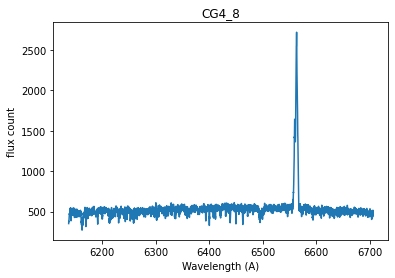

In [302]:
#Our file, star only, with comp's wavelength solution
#file='wecfzst_0057_CG4_8_comp_165.98-175.83_NEW.fits'
#file='wecfzst_0057_CG4_8_comp_165.98-175.83.fits'
file='ecfzst_0056_CG4_8.fits'

hdu=fits.open(file)
data=hdu[0].data
head=hdu[0].header
hdu.close()
print('\n'+file+':')
print(head['OBJECT'])
print(head['WAVMODE'])
print(head['GSP_FNAM'])
#print(head['GSP_FUNC'])
for h in head:
    if 'LAMP' in h:
        print(h,head[h])
fstar=data
starname=head['OBJECT']
plt.plot(w,fstar)
plt.xlabel('Wavelength (A)')
plt.ylabel('flux count')
plt.title(starname)

In [304]:
writedat('',starname+'_unnorm',[w,fstar],['#w','f'])

['#w', 'f']
It is written: CG4_8_unnorm.dat
